In [2]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

#try:
#  %tensorflow_version 2.x  # Colab only.
#except Exception:
#  pass

import tensorflow as tf
print(tf.__version__)

2.3.0


In [6]:
# 載入資料
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
y_train[:5,]

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)


array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 編譯模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 訓練模型
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3026 - accuracy: 0.9119 - val_loss: 0.1468 - val_accuracy: 0.9565
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1447 - accuracy: 0.9580 - val_loss: 0.1049 - val_accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1073 - accuracy: 0.9676 - val_loss: 0.0866 - val_accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.9724 - val_loss: 0.0821 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0755 - accuracy: 0.9762 - val_loss: 0.0767 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0646 - accuracy: 0.9788 - val_loss: 0.0755 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9813 - val_loss: 0.0709 - val_accuracy:

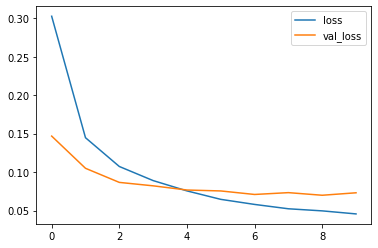

In [ ]:
# 繪出每迭代的損失
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

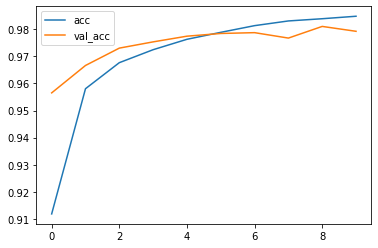

In [ ]:
# 繪出每迭代的精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# 評估模型
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0.9792
[0.07308329641819, 0.979200005531311]


Confusion matrix, without normalization
[[ 971    0    0    2    0    1    2    1    2    1]
 [   0 1119    4    0    0    0    2    1    9    0]
 [   5    1 1004    3    2    0    2    6    8    1]
 [   0    0    2  993    0    3    0    7    4    1]
 [   2    0    3    0  958    0    2    3    2   12]
 [   3    0    0   10    1  867    3    0    6    2]
 [   8    2    2    1    1    2  940    0    2    0]
 [   2    4    8    3    0    0    0 1006    0    5]
 [   4    0    1    4    4    0    1    4  953    3]
 [   3    3    0    5    6    4    0    2    5  981]]


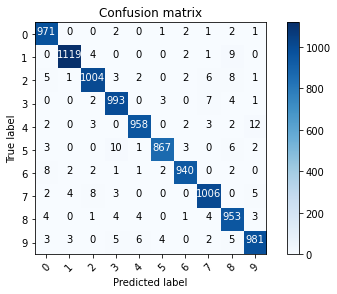

In [ ]:
# 繪製混淆矩陣(confusion matrix) 
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


# 易混淆的有 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

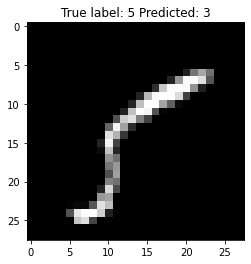

In [ ]:
# 隨機展示分錯的例子
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));